In [ ]:
Questions :
What score does <classifier>.score calculate? -> R^2 score
What does random_state do? 
Why does considering fewer neighbors in kNN mean a more complex model? 
What does the regression version of kNN mean? 

In [40]:
# Generating synthetic dataset for CLASSIFICATION
# The dataset contains 2 features (X) and 2 classes (y)
# X, y are numpy.ndarray of shapes (26, 2) and (26,) respectively 
import mglearn
X, y = mglearn.datasets.make_forge()

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0,0.5,'Second feature')

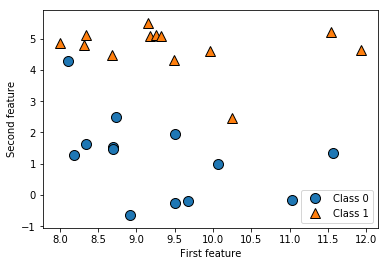

In [41]:
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

In [42]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiation of a classifier in the variable clf 
clf = KNeighborsClassifier(n_neighbors = 3)
# Fitting the classifier using the training set 
clf.fit(X_train, y_train)
# Making predictions on test set
y_pred = clf.predict(X_test)
# Evaluating the classifier's fit to test data using score
clf.score(X_test, y_test)

0.8571428571428571

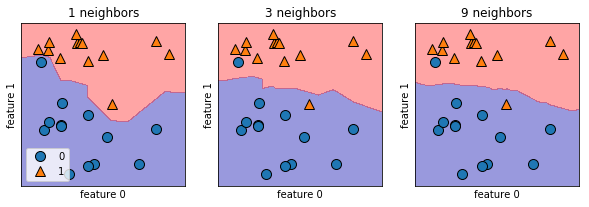

In [48]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Text(0,0.5,'Target')

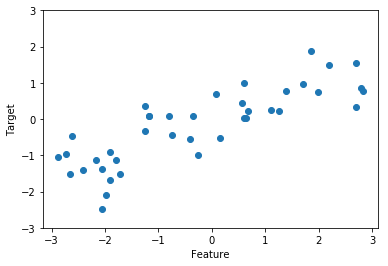

In [55]:
# Generating synthetic dataset for REGRESSION
# Has a single input feature (X) and continuous output value (y)
# X, y are numpy.ndarray of shapes (40, 1) and (40,) respectively
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

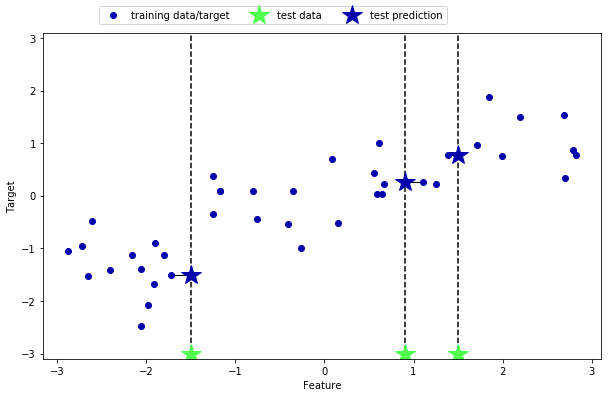

In [56]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

In [72]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors = 1)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

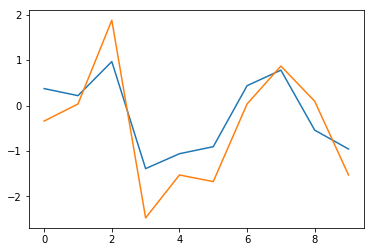

In [73]:
plt.plot(y_test)
plt.plot(reg.predict(X_test))

In [75]:
print("Test score R^2 : {}".format(reg.score(X_test,y_test)))

Test score R^2 : 0.3519867415115093


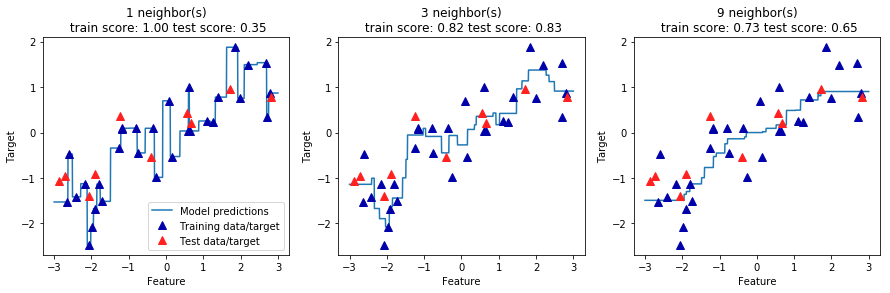

In [85]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
# Creating 1000 datapoints, evenly spaced between -3 to 3
line = np.linspace(-3,3,1000).reshape(-1,1)
for n,ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors = n)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'^',c=mglearn.cm2(1),markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
                n, reg.score(X_train, y_train),
                reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target",
                    "Test data/target"], loc="best")
    

In [24]:
# Real world classification dataset
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()
print("Cancer.keys(): \n{}".format(cancer.keys()))

Cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [30]:
print("Cancer data shape :{}".format(cancer['data'].shape))
print("Sample counts per class :{}".format({n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Number of features :{}".format(len(cancer['feature_names'])))
print("Features :{}".format(cancer['feature_names']))

Cancer data shape :(569, 30)
Sample counts per class :{'malignant': 212, 'benign': 357}
Number of features :30
Features :['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


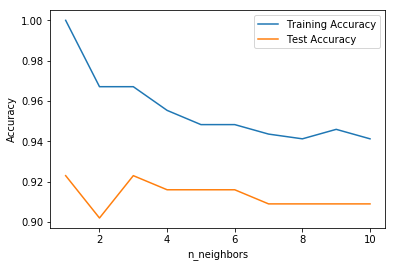

In [51]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [52]:
# Real world regression dataset 
from sklearn.datasets import load_boston
boston = load_boston()
print("Boston.keys() : \n{}".format(boston.keys()))

Boston.keys() : 
dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [33]:
print("Boston data shape :{}".format(boston['data'].shape))
print("Number of features :{}".format(len(boston['feature_names'])))
print("Features :{}".format(boston['feature_names']))

Boston data shape :(506, 13)
Number of features :13
Features :['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [35]:
# Also loading the derived dataset by combining the existing 13 features in the Boston dataset
X, y = mglearn.datasets.load_extended_boston()

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


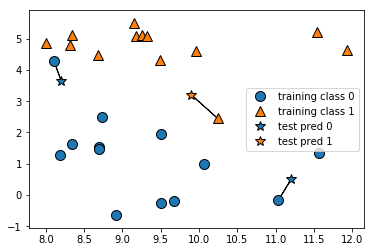

In [38]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


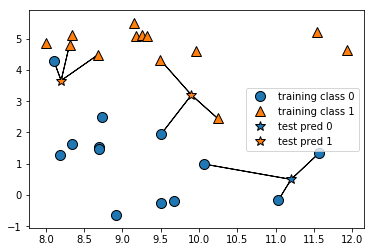

In [39]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)